In [2]:
import pandas as pd 
import numpy as np
from collections import Counter

In [3]:
import sys
sys.path.insert(1, '../oracle-polimi-contest-2019')
from evaluation_script import read_file

In [31]:
train = read_file("../oracle-polimi-contest-2019/entity-resolution_advanced-topics-training_data.csv")
test = read_file("../oracle-polimi-contest-2019/test_data.csv")

In [5]:
train = train.drop(['record_id','modification', 'type'], axis=1)
train['name'] = train['name'].str.lower()
train

,name,address,phone,email,linked_id
0,ardia enterprisesmltd.,NaN,+4102971003602,imquires@zoho.vo,10111147
1,andré almeida blanco,la Rua Pelotas; 209; apartamento 72; Bloco A; ...,NaN,NaN,12172071
2,moonta holdings ltd.,NaN,+65013464145,NaN,10104491
3,springfield investments group limited,NaN,NaN,consulting@zoho.de,10068808
4,grigory uvarov,127273; MOSCOW; OTRADNAJA STREET; HOUSE 2; NO....,NaN,NaN,13011715
5,odin group investments s.a.,NaN,+49668906658,info@outlook.cz,10105687
6,capri solutions limited,NaN,NaN,help@CAPRI.SOLUTIONS.LxMITED.de,10016805
7,crossmatch s.a.,"Akara building 24 De Castro Street, Wickham Ca...",NaN,CrossmatchSA@aol.gov,12133421
8,laurence pountney ltd,Akara Building 24 De Castro St; Wickham Cay I;...,NaN,support@LAURENCE.POUNTNEY.LTD.gov,12126772
9,"breit, marcus",NaN,+440180275310,NaN,11002523


# Name 

In [6]:
count_values = train['name'].value_counts()

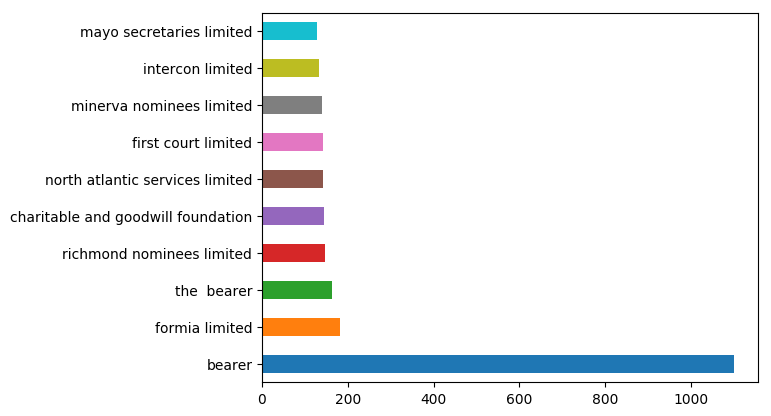

In [29]:
count_values[:10].plot.barh()

In [8]:
# Count occurrences of each word
from collections import Counter

names = list(train.name.astype(str).values)
unique_names = list(set(names))
all_names = ' '.join(unique_names)
words = list(all_names.split(' '))

most_common_words = Counter(words).most_common()
#most_common_words

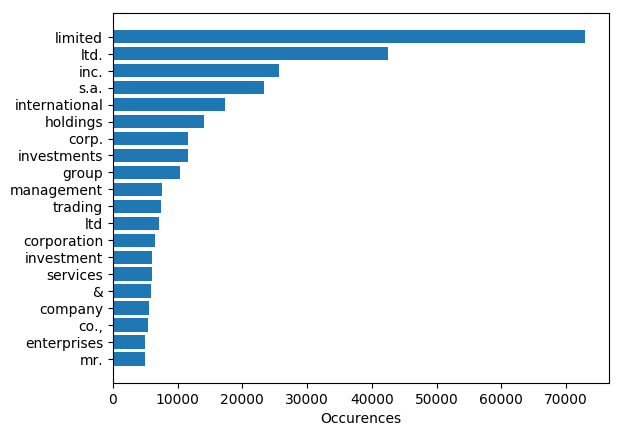

In [9]:
import matplotlib.pyplot as plt

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
word = [x[0] for x in most_common_words[:20]]
y_pos = np.arange(len(word))

occurrences = np.array([x[1] for x in most_common_words[:20]])
ax.barh(y_pos, occurrences , align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(word)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Occurences')
#ax.set_title('How fast do you want to go today?')

plt.show()

In [10]:
# Where is bearer?

In [11]:
dict_most_common = dict(most_common_words)
dict_most_common['bearer']

206

# Phone

In [12]:
train['phone'].value_counts()

+4120046828984    10
+338575880868      9
+14183960626       9
+49950790096       9
+14677912072       9
+449617515083      9
+337366448835      9
+3973968219        9
+3937148562        9
+3974063124        9
+420837423324      9
+3954432621        9
+336675226659      8
+339242752104      8
+332761816356      8
+4128143778524     8
+420688658346      8
+336687534465      8
+331638613404      8
+11961904654       8
+3918638433        8
+49360188262       8
+13196428534       8
+19495032643       8
+13196305054       8
+449813259737      8
+3952985097        8
+16406224858       8
+4199884679549     8
+449021185622      8
                  ..
+49086725494       1
+3943322031        1
+3929512332        1
+443747032335      1
+444285728477      1
+4140197090798     1
+334786417080      1
+440655567474      1
+12211039972       1
+4159491230753     1
+14307270575       1
+15694806484       1
+49496056348       1
+3955043971        1
+12085273063       1
+446563256957      1
+3933224256  

### How many NaNs?

In [13]:
train.shape

(691440, 5)

In [14]:
train['phone'].isna().sum()

270531

In [15]:
nan_phone_df = train[train['phone'].isna()]
nan_phone_df

,name,address,phone,email,linked_id
1,andré almeida blanco,la Rua Pelotas; 209; apartamento 72; Bloco A; ...,NaN,NaN,12172071
3,springfield investments group limited,NaN,NaN,consulting@zoho.de,10068808
4,grigory uvarov,127273; MOSCOW; OTRADNAJA STREET; HOUSE 2; NO....,NaN,NaN,13011715
6,capri solutions limited,NaN,NaN,help@CAPRI.SOLUTIONS.LxMITED.de,10016805
7,crossmatch s.a.,"Akara building 24 De Castro Street, Wickham Ca...",NaN,CrossmatchSA@aol.gov,12133421
8,laurence pountney ltd,Akara Building 24 De Castro St; Wickham Cay I;...,NaN,support@LAURENCE.POUNTNEY.LTD.gov,12126772
11,commtech foundation inc.,1441 Brickell Avenue 1200 Four Seasons Tower M...,NaN,consulting@yahoo.it,10002433
13,yury valentinovich tskhovrebov,10u-1-74; PiOwPECT MARSHALA JUKOVA; MOSCOW; RU...,NaN,NaN,12076657
14,li guobang,ROOM 102; BUILDING 37; NO.18; TAIPINGJIAO 4 RO...,NaN,GUOBANG@icloud.com,12188364
17,refik arif,Korkadi sokak Panorama Villalari; No: 17-C; D ...,NaN,REFIKARIF@hotmail.gov,12170030


In [16]:
nan_phone_df.linked_id.value_counts().shape

(129657,)

In [18]:
train['phone'] = train['phone'].str.replace('+', '')

,name,address,phone,email,linked_id
0,ardia enterprisesmltd.,NaN,4102971003602,imquires@zoho.vo,10111147
1,andré almeida blanco,la Rua Pelotas; 209; apartamento 72; Bloco A; ...,NaN,NaN,12172071
2,moonta holdings ltd.,NaN,65013464145,NaN,10104491
3,springfield investments group limited,NaN,NaN,consulting@zoho.de,10068808
4,grigory uvarov,127273; MOSCOW; OTRADNAJA STREET; HOUSE 2; NO....,NaN,NaN,13011715
5,odin group investments s.a.,NaN,49668906658,info@outlook.cz,10105687
6,capri solutions limited,NaN,NaN,help@CAPRI.SOLUTIONS.LxMITED.de,10016805
7,crossmatch s.a.,"Akara building 24 De Castro Street, Wickham Ca...",NaN,CrossmatchSA@aol.gov,12133421
8,laurence pountney ltd,Akara Building 24 De Castro St; Wickham Cay I;...,NaN,support@LAURENCE.POUNTNEY.LTD.gov,12126772
9,"breit, marcus",NaN,440180275310,NaN,11002523


In [26]:
train['phone_len'] = train['phone'].apply(lambda x: len(x) if not isinstance(x,float) else x)

In [28]:
train['phone_len'].value_counts()

12.0    179840
11.0    120954
13.0     60145
10.0     59970
Name: phone_len, dtype: int64

# Linked_id

In [30]:
train['linked_id'].value_counts()

10200030    12
12123164    12
12179222    12
12224364    12
13009622    12
12208931    12
12222615    12
10193879    12
12045240    12
12188203    12
13011352    12
10035266    12
10069831    12
12116850    12
10154845    12
12144852    12
12215374    12
10177550    12
12126265    12
10063692    12
12220320    12
12212336    12
10099801    12
10044690    11
10178023    11
10148222    11
12139640    11
12172866    11
12172348    11
12113245    11
            ..
10200803     1
10152893     1
10113608     1
10035545     1
12147936     1
10212791     1
10001019     1
12164447     1
11013669     1
10189572     1
10073513     1
12154330     1
13006935     1
10133414     1
10018598     1
10088122     1
12195462     1
10010718     1
10167039     1
12147261     1
10111154     1
10210092     1
10208011     1
10178112     1
12201502     1
13005772     1
10088158     1
10173593     1
13008554     1
12186558     1
Name: linked_id, Length: 267244, dtype: int64

In [38]:
group = train[['name', 'linked_id']].groupby('linked_id').describe()

KeyboardInterrupt: 